# ImagoAI
## Machine Learning Assignment
## Task: Prediction of Deoxynivalenol (DON) Concentration using Machine Learning
## Arti Gupta

# Dataset Description
1. Features: Spectral reflectance values measured at various wavelengths.
2. Samples: Each row represents an individual corn sample.
3. Target: DON concentration (continuous numerical value).


# Goal of the Project
The objective of this project is to develop a predictive model to estimate DON (Deoxynivalenol) concentration based on input features. This model helps in detecting and managing DON contamination, which is a significant concern in food safety and agricultural industries. The goal is to improve prediction accuracy and provide actionable insights for quality control.

# Tool Used
1. Pandas & NumPy (Data preprocessing)
2. Scikit-learn (Machine Learning Model)
3. Matplotlib & Seaborn (Data visualization)
4. SHAP (Explainable AI for model interpretation)
5. Joblib (Model saving/loading)

# Load the datadet

In [83]:
import pandas as pd
import numpy as np

In [84]:
df=pd.read_csv("MLE-Assignment.csv")

In [85]:
df

,hsi_id,0,1,2,3,4,5,6,7,8,...,439,440,441,442,443,444,445,446,447,vomitoxin_ppb
0,imagoai_corn_0,0.416181,0.396844,0.408985,0.372865,0.385293,0.365390,0.355226,0.343350,0.344837,...,0.710280,0.717482,0.715078,0.705379,0.696691,0.692793,0.711369,0.697679,0.704520,1100.0
1,imagoai_corn_1,0.415797,0.402956,0.402564,0.396014,0.397192,0.389634,0.375671,0.363689,0.373883,...,0.684011,0.697271,0.701995,0.696077,0.701012,0.677418,0.696921,0.696544,0.689054,1000.0
2,imagoai_corn_2,0.389023,0.371206,0.373098,0.373872,0.361056,0.349709,0.333882,0.330841,0.328925,...,0.683054,0.669286,0.663179,0.676165,0.676591,0.655951,0.658945,0.670989,0.665176,1300.0
3,imagoai_corn_3,0.468837,0.473255,0.462949,0.459335,0.461672,0.459824,0.458194,0.427737,0.415360,...,0.742782,0.730801,0.736787,0.730044,0.751437,0.738497,0.742446,0.754657,0.733474,1300.0
4,imagoai_corn_4,0.483352,0.487274,0.469153,0.487648,0.464026,0.451152,0.458229,0.440782,0.426193,...,0.770227,0.773013,0.761431,0.763488,0.762473,0.744012,0.775486,0.760431,0.751988,220.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,imagoai_corn_495,0.478140,0.444033,0.442120,0.437473,0.428672,0.413238,0.417758,0.420388,0.413290,...,0.747858,0.730535,0.716969,0.739297,0.724827,0.720484,0.740626,0.740116,0.721839,1200.0
496,imagoai_corn_496,0.409367,0.394941,0.380236,0.375340,0.346122,0.354650,0.361170,0.342974,0.352137,...,0.670232,0.659045,0.661587,0.658422,0.644254,0.646479,0.656779,0.646700,0.646733,0.0
497,imagoai_corn_497,0.486526,0.501372,0.500175,0.508139,0.489411,0.457311,0.462321,0.462927,0.442647,...,0.787532,0.780347,0.768362,0.771411,0.770919,0.761464,0.770314,0.763324,0.797187,0.0
498,imagoai_corn_498,0.464595,0.498822,0.489077,0.453381,0.487636,0.461950,0.461671,0.447362,0.451952,...,0.739432,0.759722,0.752118,0.761910,0.761111,0.730431,0.753545,0.749619,0.756383,0.0


In [86]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,439,440,441,442,443,444,445,446,447,vomitoxin_ppb
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,...,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,0.443118,0.440761,0.433814,0.426122,0.418990,0.412432,0.405868,0.399815,0.394038,0.389664,...,0.741255,0.740818,0.740459,0.739758,0.739850,0.738738,0.738298,0.737599,0.738099,3410.006000
std,0.044719,0.045520,0.045764,0.046070,0.045405,0.044727,0.044528,0.043773,0.043659,0.043442,...,0.053479,0.053695,0.053812,0.053666,0.053487,0.053601,0.054014,0.054136,0.054297,13095.803483
min,0.311182,0.295321,0.284064,0.282054,0.296702,0.286860,0.262876,0.278523,0.255529,0.261459,...,0.562662,0.585011,0.558412,0.571735,0.575259,0.571767,0.577803,0.576985,0.562302,0.000000
25%,0.410456,0.404310,0.397038,0.389029,0.382102,0.377157,0.369620,0.364823,0.360634,0.355246,...,0.702105,0.703701,0.702988,0.700889,0.701690,0.700638,0.698655,0.698107,0.699673,137.500000
50%,0.449105,0.442651,0.434215,0.425074,0.417075,0.411872,0.405443,0.397917,0.393803,0.387211,...,0.743857,0.745922,0.745062,0.743991,0.744004,0.743965,0.743301,0.745216,0.745733,500.000000
75%,0.480245,0.478822,0.473158,0.464947,0.459232,0.452198,0.444384,0.438728,0.431165,0.427039,...,0.777884,0.776210,0.777069,0.774759,0.775698,0.775686,0.775621,0.774635,0.774310,1700.000000
max,0.556287,0.530168,0.528774,0.533202,0.511909,0.501786,0.504054,0.490692,0.489272,0.472080,...,0.940642,0.940361,0.939153,0.930366,0.942615,0.945225,0.932812,0.931381,0.957860,131000.000000


In [87]:
df.isnull().sum()

hsi_id           0
0                0
1                0
2                0
3                0
                ..
444              0
445              0
446              0
447              0
vomitoxin_ppb    0
Length: 450, dtype: int64

In [88]:
df.duplicated().sum()

0

In [89]:
df=df.drop("hsi_id",axis=1)

# Exploratory Data Analysis

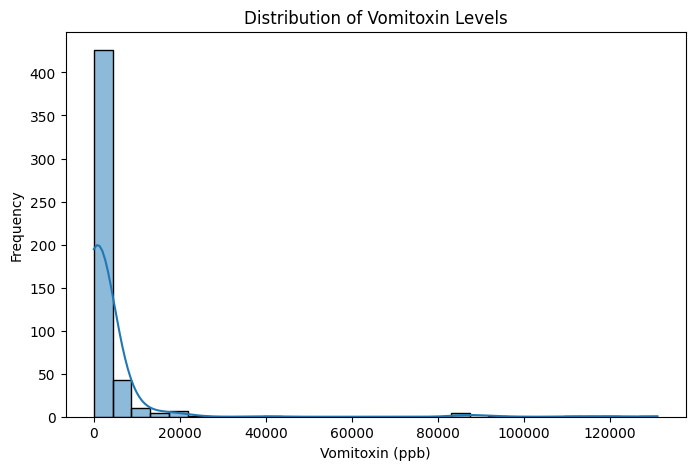

In [90]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot histogram of the target variable
plt.figure(figsize=(8, 5))
sns.histplot(df['vomitoxin_ppb'], bins=30, kde=True)
plt.xlabel('Vomitoxin (ppb)')
plt.ylabel('Frequency')
plt.title('Distribution of Vomitoxin Levels')
plt.show()

The histogram shows a right-skewed distribution for vomitoxin_ppb, meaning most samples have lower toxin levels, but a few have extremely high values.

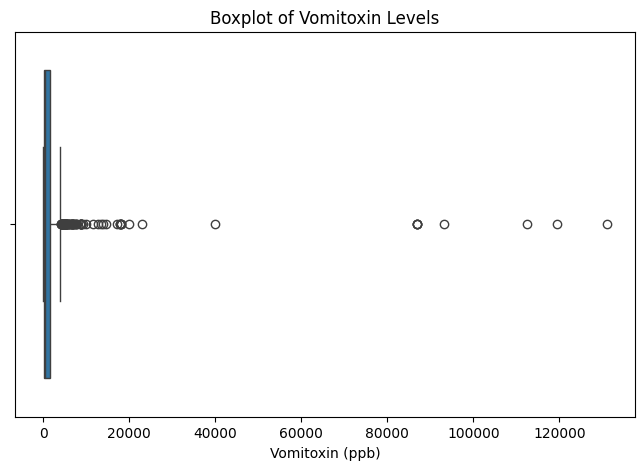

In [91]:
# Boxplot to detect outliers
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['vomitoxin_ppb'])
plt.xlabel('Vomitoxin (ppb)')
plt.title('Boxplot of Vomitoxin Levels')
plt.show()

The boxplot confirms potential outliers in the higher range (above 1000 ppb).

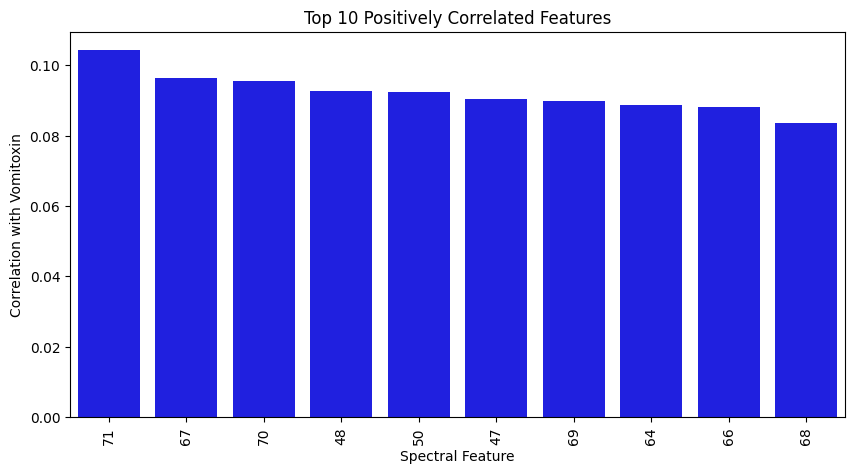

In [92]:
correlations = df.corr()['vomitoxin_ppb'].sort_values(ascending=False)

top_corr_features = correlations[1:11] 

plt.figure(figsize=(10, 5))
sns.barplot(x=top_corr_features.index, y=top_corr_features.values, color='blue')
plt.xticks(rotation=90)
plt.xlabel('Spectral Feature')
plt.ylabel('Correlation with Vomitoxin')
plt.title('Top 10 Positively Correlated Features')
plt.show()

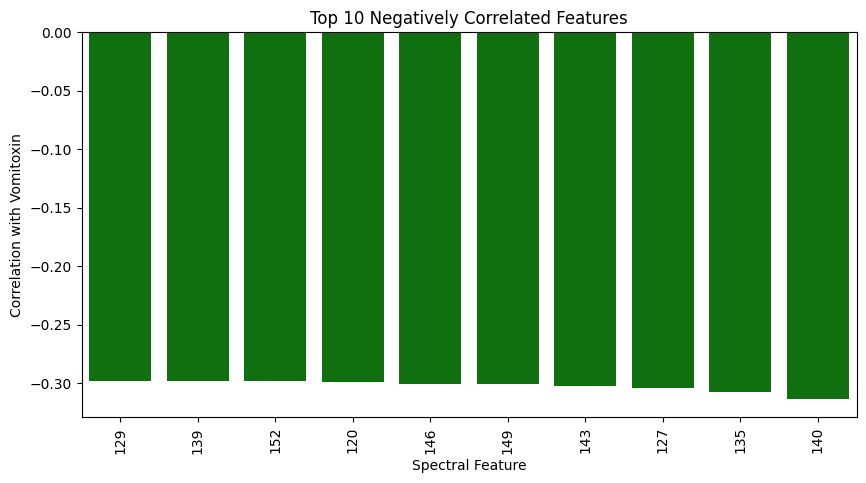

In [93]:
bottom_corr_features = correlations[-10:]
plt.figure(figsize=(10, 5))
sns.barplot(x=bottom_corr_features.index, y=bottom_corr_features.values, color='green')
plt.xticks(rotation=90)
plt.xlabel('Spectral Feature')
plt.ylabel('Correlation with Vomitoxin')
plt.title('Top 10 Negatively Correlated Features')
plt.show()

1. Some spectral features have moderate correlations with vomitoxin_ppb (both positive and negative).
2. The top positively correlated features may indicate wavelengths where higher reflectance is associated with increased toxin levels.
3. The negatively correlated features suggest wavelengths where lower reflectance corresponds to higher toxin levels.

In [94]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [95]:
x=df.drop("vomitoxin_ppb",axis=1)
y=df["vomitoxin_ppb"]

In [96]:
x_scaled=scaler.fit_transform(x)

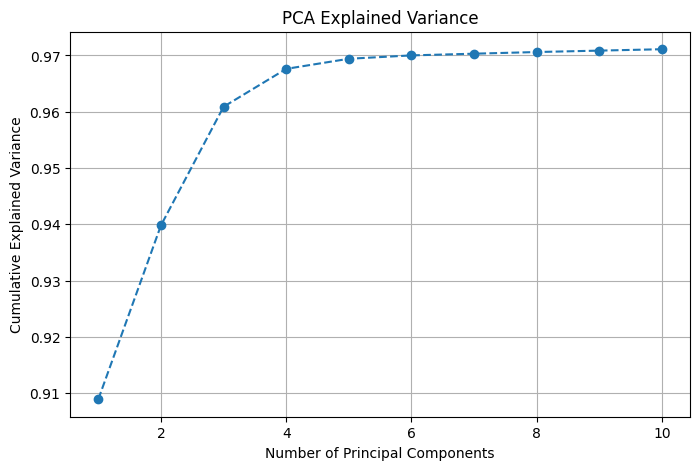

In [97]:
from sklearn.decomposition import PCA
pca = PCA(n_components=10)
X_pca = pca.fit_transform(x)
explained_variance = pca.explained_variance_ratio_.cumsum()

# Plot cumulative explained variance
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), explained_variance, marker='o', linestyle='--')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA Explained Variance')
plt.grid()
plt.show()

1. The first few principal components capture a significant portion of variance in the data.
2. This suggests that dimensionality reduction could be beneficial for downstream analysis and modeling.

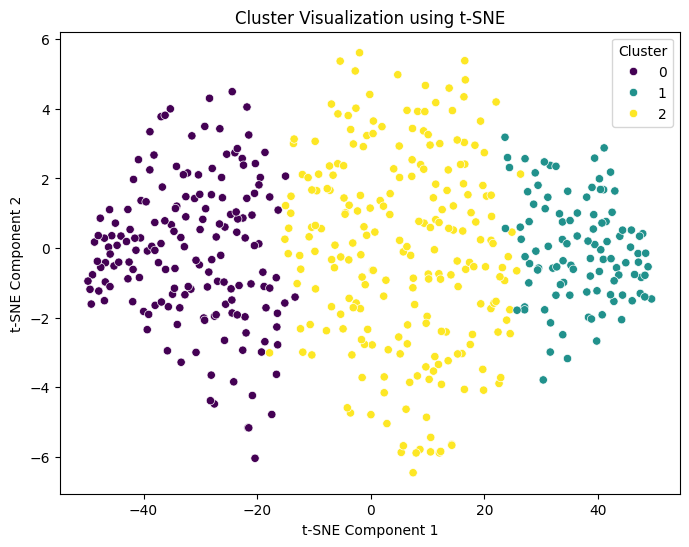

In [98]:
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
top_features = correlations[1:11].index.tolist()

# Step 2: Apply K-Means Clustering on the selected features
X_selected = df[top_features]
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(X_selected)

# Step 3: Dimensionality Reduction using t-SNE for visualization
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_selected)

# Plot Clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1], hue=df['Cluster'], palette='viridis')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.title('Cluster Visualization using t-SNE')
plt.legend(title='Cluster')
plt.show()

The clusters suggest some natural groupings in the data based on the spectral features.

# Train and Test Data Splitting

In [99]:
from sklearn.model_selection import train_test_split

In [100]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [101]:
x_train=scaler.fit_transform(x_train)

In [102]:
x_test=scaler.transform(x_test)

# MLPRgeressor (Multi-Layer Perceptron Regressor)

In [103]:
from sklearn.neural_network import MLPRegressor

In [104]:
model = MLPRegressor(hidden_layer_sizes=(64, 32), activation='relu', solver='adam', max_iter=500)
model.fit(x_train, y_train)


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPRegressor(hidden_layer_sizes=(64, 32), max_iter=500)

In [105]:
y_pred = model.predict(x_test)

# Model Evaluation

In [106]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [107]:
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print(f'MAE: {mae}, RMSE: {rmse}, R² Score: {r2}')

MAE: 3327.39000845381, RMSE: 10027.047642857331, R² Score: 0.6403228105854823


In [ ]:
Visualizing predictions vs. actual values.

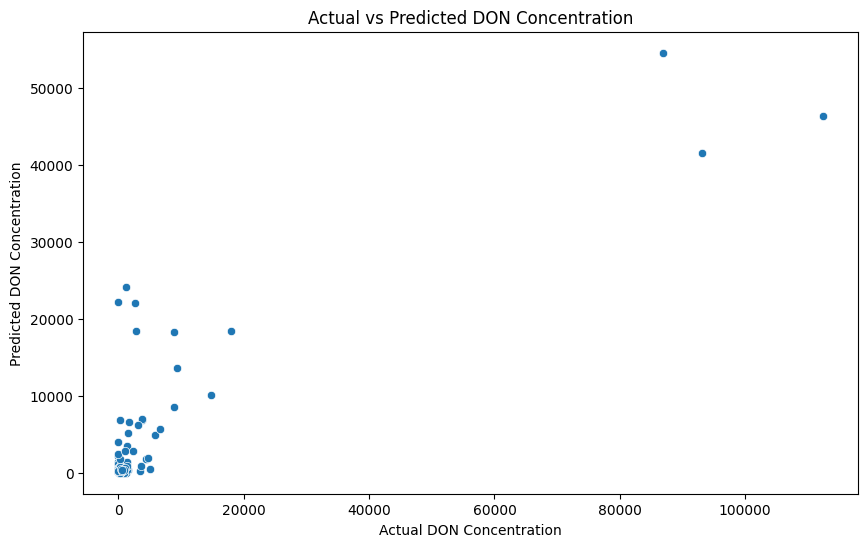

In [111]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual DON Concentration")
plt.ylabel("Predicted DON Concentration")
plt.title("Actual vs Predicted DON Concentration")
plt.show()

In [78]:
import shap
import joblib

# Save Model

In [79]:
joblib.dump(model, 'ml_model.pkl')

['ml_model.pkl']

  0%|          | 0/100 [00:00<?, ?it/s]

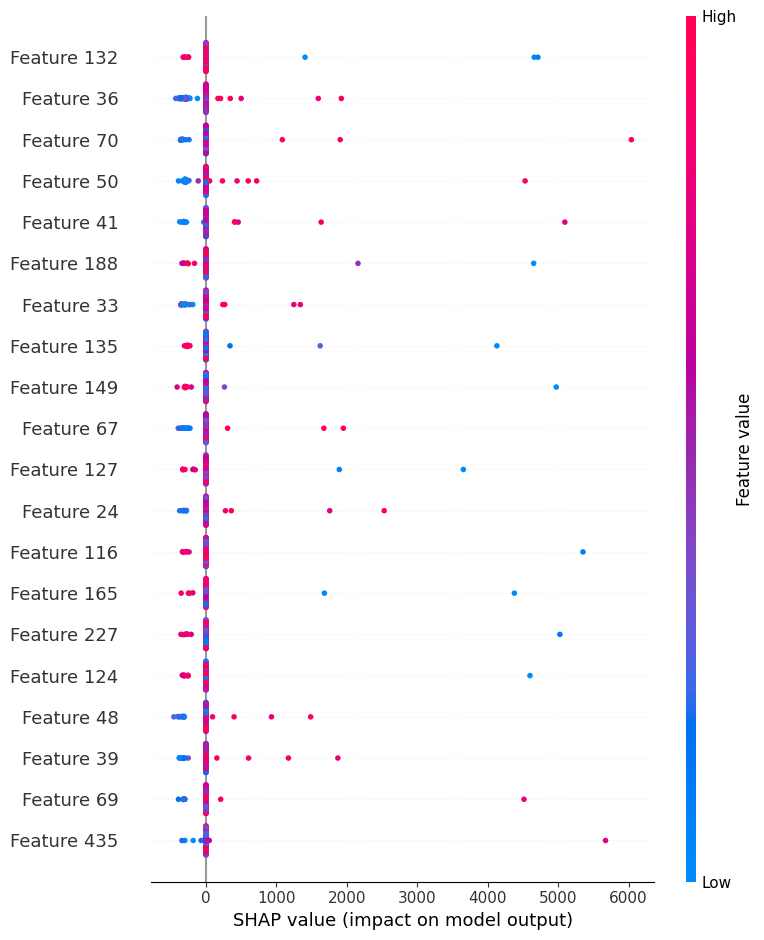

In [110]:
def model_predict(X):
    return model.predict(X)

# Use KernelExplainer for models that are not directly callable
explainer = shap.KernelExplainer(model_predict, shap.sample(x_train, 100))  # Use a small sample for efficiency
shap_values = explainer.shap_values(x_test)

# Summary plot
shap.summary_plot(shap_values, x_test)

Feature 132, Feature 36, and Feature 70 seem to be the most impactful in the first image.